In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
data = pd.read_csv('C:/Users/monte/OneDrive/Documentos/codigos/projeto-house-price-prediction/house-price-prediction/data/processed/housing_final.csv')
print(data.head())

   bedrooms_per_household  bedrooms_per_room  households  housing_median_age  \
0                0.754386           0.272152        57.0                 2.0   
1                1.979866           0.352029       149.0                 2.0   
2                1.152542           0.210201       118.0                 2.0   
3                0.975096           0.193610       522.0                 2.0   
4                1.170792           0.204585       808.0                 2.0   

   median_house_value  median_income  median_income_squared  \
0             60000.0         2.5625               6.566406   
1            237500.0         2.8750               8.265625   
2            310000.0         6.6410              44.102881   
3            158500.0         4.2361              17.944543   
4            214500.0         3.6736              13.495337   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0        

In [5]:
# Definir a variável alvo e as features
target = 'median_house_value'
if target not in data.columns:
    raise ValueError(f"A coluna '{target}' não foi encontrada no dataset.")

X = data.drop(target, axis=1)
y = data[target]

print(f"Total de features: {X.shape[1]}, Total de amostras: {X.shape[0]}")


Total de features: 19, Total de amostras: 20433


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")


Treino: (16346, 19), Teste: (4087, 19)


In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 2632070255.68
R²: 0.80


In [14]:
# importâncias das features
importances = rf_model.feature_importances_

if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

#  dataframe para visualizar as importâncias
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

print("As 10 features mais importantes:")
print(feat_importances.head(10))


As 10 features mais importantes:
                     Feature  Importance
5      median_income_squared    0.237992
4              median_income    0.235279
7     ocean_proximity_INLAND    0.142037
12  population_per_household    0.119862
17                 longitude    0.056659
18                  latitude    0.054204
3         housing_median_age    0.041600
0     bedrooms_per_household    0.021558
1          bedrooms_per_room    0.021322
13       rooms_per_household    0.020845


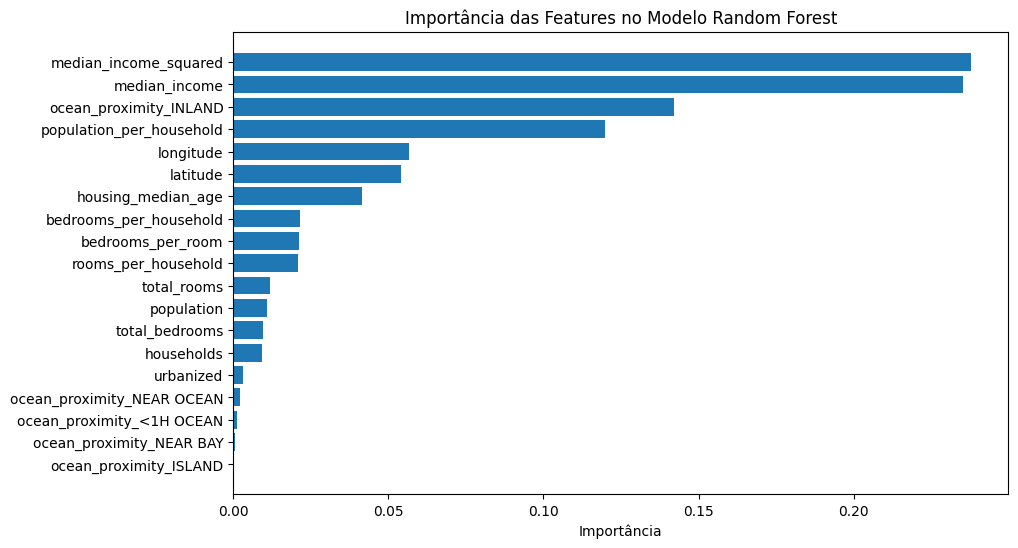

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'])
plt.gca().invert_yaxis()  # A feature mais importante no topo
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo Random Forest')
plt.show()
